# Housing Price Prediction

This intermediate level Machine Learning problem utilizes Advanced Regression technique to predict the house price.

In [110]:
#importing the necessary packages
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns' , 200)

from sklearn.preprocessing import MinMaxScaler , PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNet , Lasso , Ridge, LinearRegression

## Step 1: Importing the Dataset

The stored dataset is downloaded from Kaggle.com and is stored in the current diretory only. The <code>train.csv</code> is the file which stores the training dataset.

In [111]:
#importing the dataframe

house_pr_df = pd.read_csv('train.csv')

house_pr_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [82]:
X = house_pr_df.drop('SalePrice' , axis = 1) #Setting the features aside in the variable X
y = house_pr_df['SalePrice'] #Setting the target aside in variable y

X.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [112]:
#Lets check the simple information of the dataset

house_pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [113]:
len(house_pr_df.columns)

81

We can observe there are a lot of Categorical as well as Numeric features. Lets separate them out and then deal with them separately. Also, lets analyze the data based on the missing values too.

## Step 2: Data Analysis

Lets start by deal with the <b>Numeric Variables</b> first.

### 2.1: Analyzing Numeric Variables

In [114]:
#Lets curve out the numeric variables and thereby form the numeric only dataframe 

numeric_features = [cols for cols in X.columns if (X[cols].dtype != 'O' and cols != 'Id')]

numeric_df = X[numeric_features]

numeric_df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


The Id column is kinda unnecessary and thereby I have dropped it before moving with my further analysis.

Now, lets move on and start dealing with the missing values related to the numeric variables.

In [115]:
(numeric_df.isnull().sum() / len(numeric_df)) * 100 #checking the percentage

MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
dtype: float64

Okay! So I will be dealing with the missing values based on the boxplots of the features with missing values.

I am adapting this featuring since the percentage of missing values is quite less.

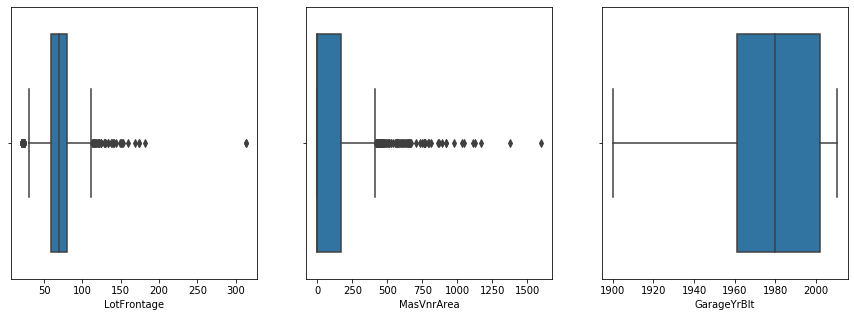

In [116]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.boxplot(numeric_df['LotFrontage'])
plt.subplot(1,3,2)
sns.boxplot(numeric_df['MasVnrArea'])
plt.subplot(1,3,3)
sns.boxplot(numeric_df['GarageYrBlt'])

plt.show()

I have a hunch that there is a higher percentage of Garages Built on the same year as the House is built.

In [117]:
sum(numeric_df['GarageYrBlt'] == numeric_df['YearBuilt']) / len(numeric_df)

0.7458904109589041

Yes. It was right.

Furthermore, the GarageYrBuilt might be missing because there is no garage.

We can check this by utilizing the GarageArea column.

In [118]:
no_area = numeric_df.loc[numeric_df['GarageArea'] == 0.0]

len(no_area.loc[no_area['GarageYrBlt'].isnull()])

81

That was the case. The Garages aren't built.

It would be better if we created a categorical variable based on this. If the lot has garage or not.
There is indeed a categorical variable in the dataset which does this. Hence, this column kind off doesn't bear any importance.

The column MasVnrArea is kinda dependent on another column MasVnrType.

Lets visualize if thats the case.

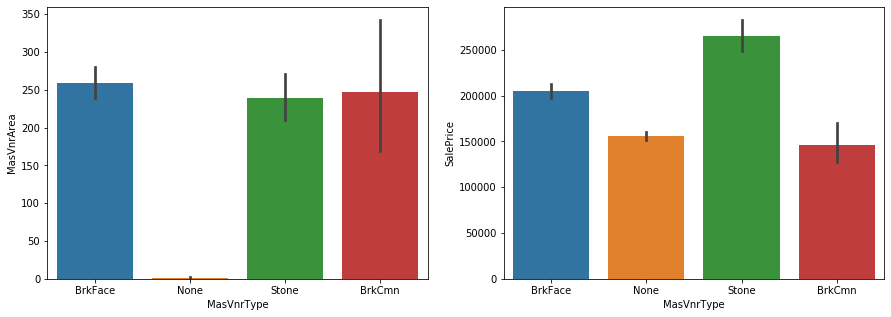

In [119]:
plt.figure(figsize = (15 , 5))
plt.subplot(1,2,1)
sns.barplot(X['MasVnrType'] , X['MasVnrArea'])

plt.subplot(1,2,2)
sns.barplot(X['MasVnrType'] , y)

plt.show()

It is clearly visible that the MasVnrArea is significantly dependant on MasVnrType and the MasVnrArea which has NaN values are basically of the None Type, which resembles the absence. Hence, we are going to replace the NaN with 0.

Lets now move on to the LotFrontage feature. Since, it is basically the strip of area connected to the street, missing values suggests that there is no area basically. Hence, we are going to replace the NaN with 0.

So for the missing values we are going to do the following things:

1. Make a new variable GarageAge based on the formula (YrSold - GarageYrBuilt). The NaN values are basically nothing but the No Garages one, we will make them 0.

2. Replace the NaN values of MasVnrArea with 0.

3. Similarly, Replace the Nan values of LotFrontage to 0.

In [120]:
numeric_df['GarageAge'] = numeric_df['YrSold'] - numeric_df['GarageYrBlt']

numeric_df['GarageAge'].fillna(0 , inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [121]:
numeric_df['GarageAge'].isnull().sum()

0

I will be removing the GarageYrBlt feature since its of no use now!

In [122]:
numeric_df.drop('GarageYrBlt' , axis = 1 , inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now, lets replace the Nan values of the MasVnrArea and LotFrontage with zeros.

In [123]:
numeric_df['MasVnrArea'].fillna(0 , inplace = True)
numeric_df['LotFrontage'].fillna(0 , inplace = True)

In [124]:
print(numeric_df['MasVnrArea'].isnull().sum() , numeric_df['LotFrontage'].isnull().sum())

0 0


And we are done with the missing values.

Now, moving on. I could see there are few variables such as YrSold, YearBuilt and YearRemodAdd which could be used as new variables with the combination of two rather than being used singularly. 

In [125]:
numeric_df['HouseAge'] = numeric_df['YrSold'] - numeric_df['YearBuilt']
numeric_df['RemodAge'] = numeric_df['YrSold'] - numeric_df['YearRemodAdd']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Lets see the orientation of these new variables with the selling price.

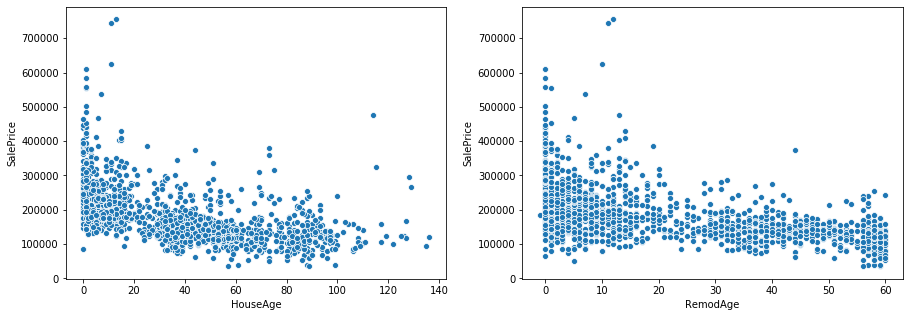

In [126]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(numeric_df['HouseAge'] , y)

plt.subplot(1,2,2)
sns.scatterplot(numeric_df['RemodAge'] , y)

plt.show()

This doesn't seem that much likely but a log-transform would make some difference I feel. We are going to sort things out later.

For now, I could see there are few features like OverallQual, OverallCond, etc. which are listed as numeric variables. A quick scan through the data description its found that these are basically ordinal variables and are not continuous.

Lets visualize their relationship with the SalePrice and thereafter crop them out of numeric_df and have their own df.

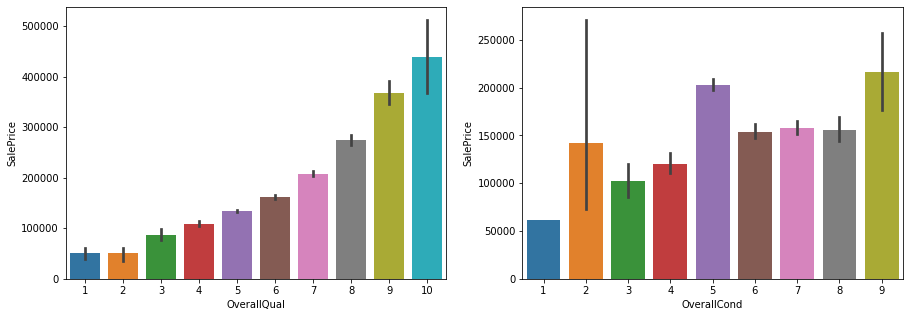

In [127]:
plt.figure(figsize = (15 , 5))
plt.subplot(1,2,1)
sns.barplot(numeric_df['OverallQual'] , y)

plt.subplot(1,2,2)
sns.barplot(numeric_df['OverallCond'] , y)

plt.show()

Voila! It resembles some sort of pattern too.

Lets separate them out!

In [128]:
ordinal_features = [ordinal for ordinal in numeric_df.columns if (len(np.unique(numeric_df[ordinal])) < 25)]

ordinal_df = numeric_df[ordinal_features]

ordinal_df.head(5)

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


With the all the ordinal values separated lets check the barplots of each one of them with the selling price.

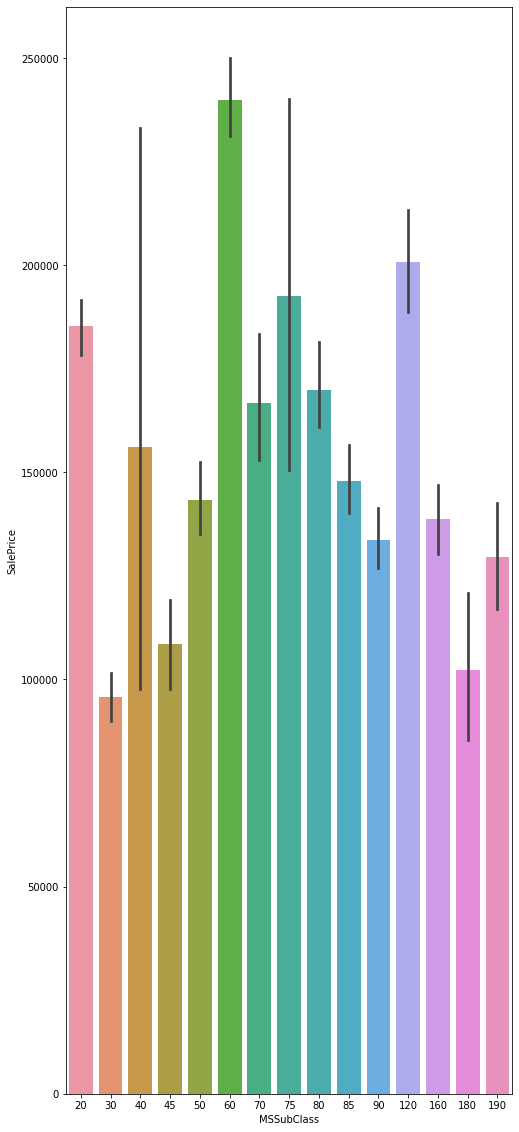

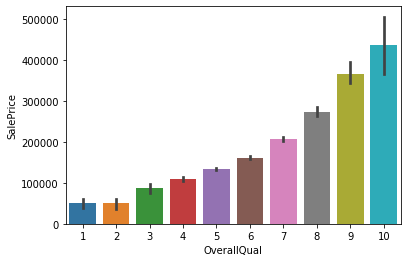

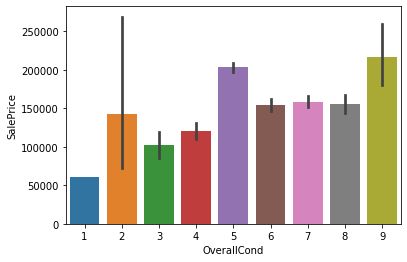

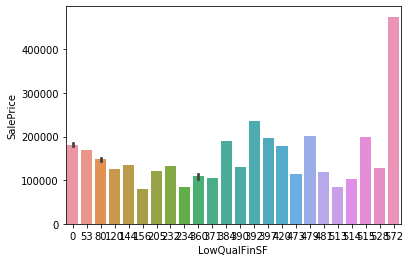

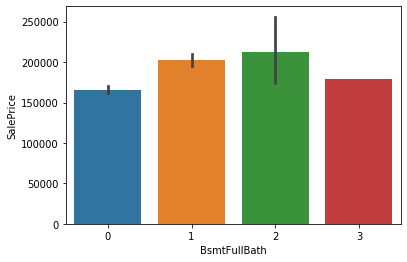

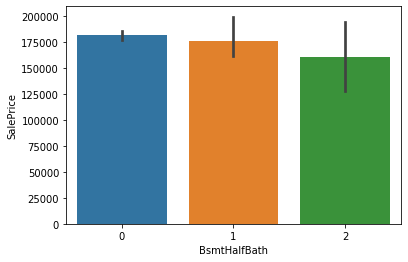

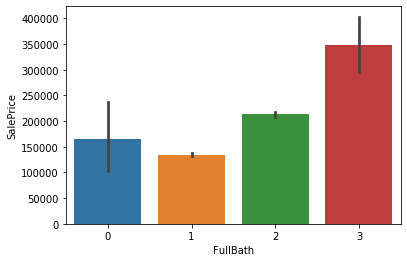

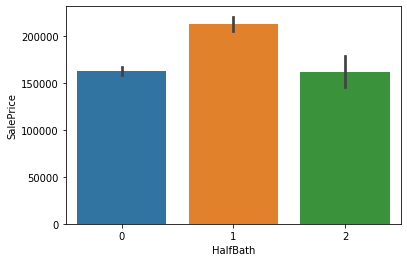

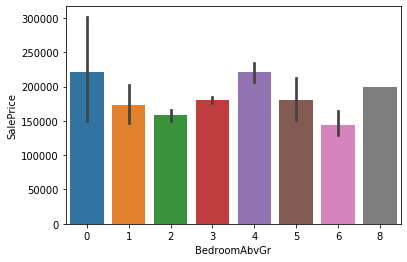

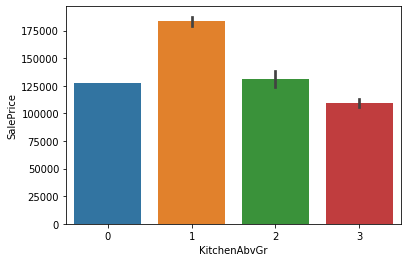

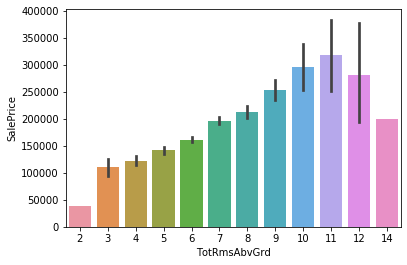

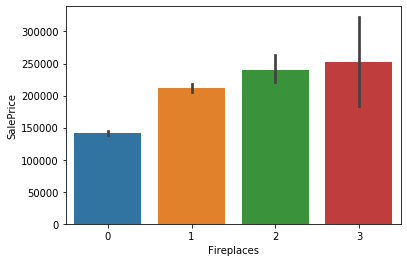

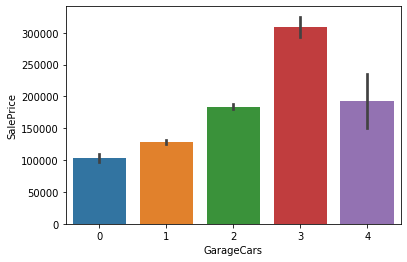

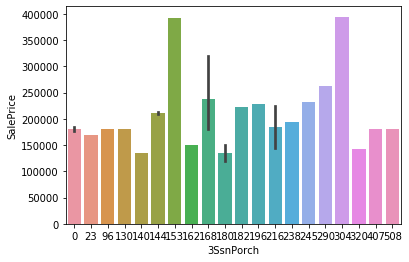

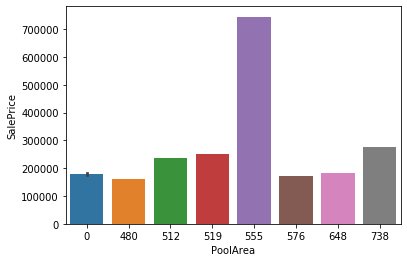

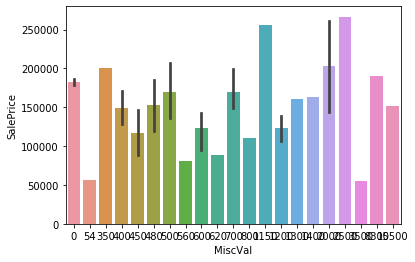

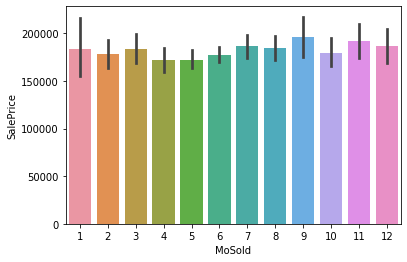

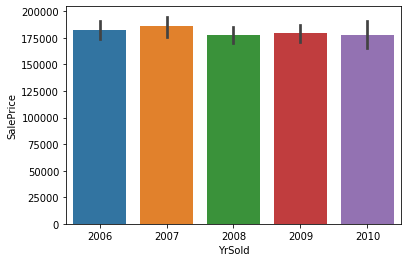

In [129]:
plt.figure(figsize = (8, 20))
pos = 1
for i in ordinal_features:
    sns.barplot(ordinal_df[i] , y)
    plt.savefig('plot{}.jpg'.format(pos))
    pos = pos + 1
    plt.show()

In [99]:
len(ordinal_features)

18

Now the rest of the variables in numeric_df are continuous variables. We are going to create a continuous variable df and probably derive a transformation of sort too to make it more natural.

In [130]:
continuous_features = [cont for cont in numeric_df.columns if (cont not in ordinal_features)]

continuous_df = numeric_df[continuous_features]

continuous_df.head(5)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,GarageAge,HouseAge,RemodAge
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,5.0,5,5
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,31.0,31,31
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,7.0,7,6
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,8.0,91,36
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,8.0,8,8


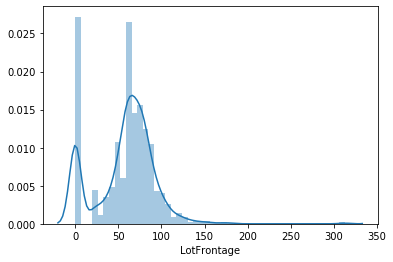

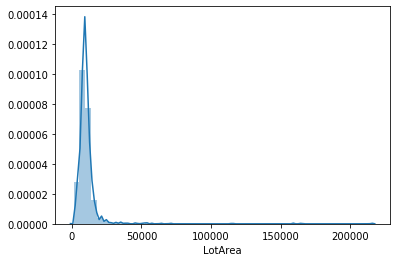

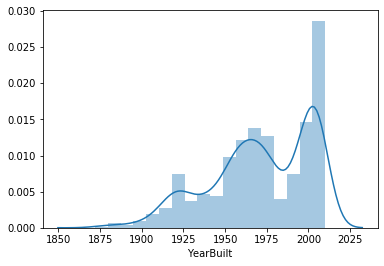

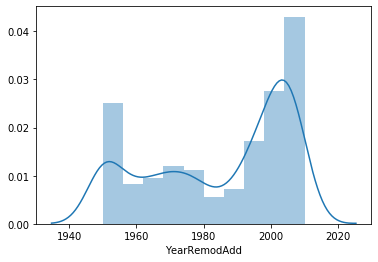

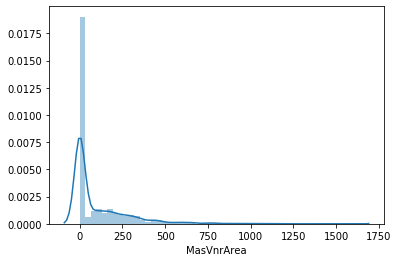

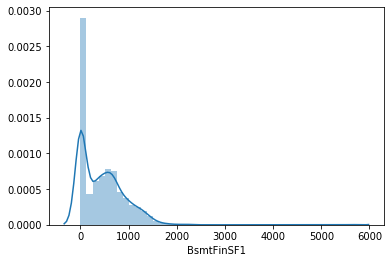

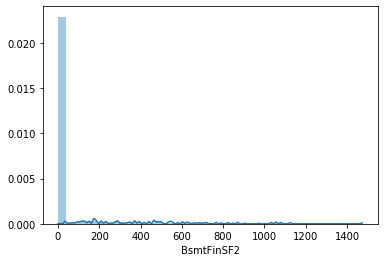

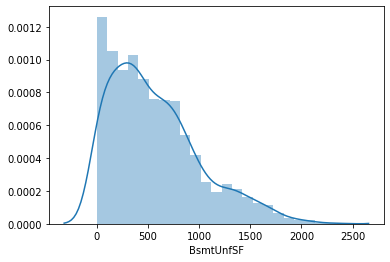

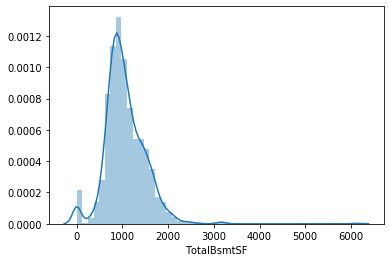

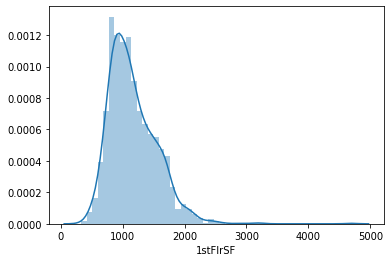

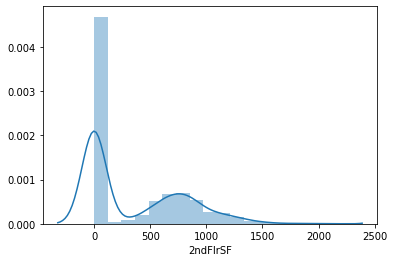

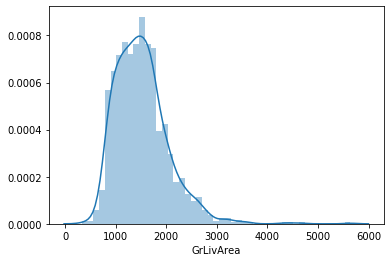

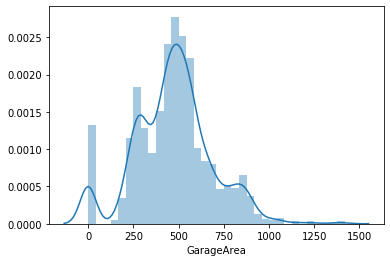

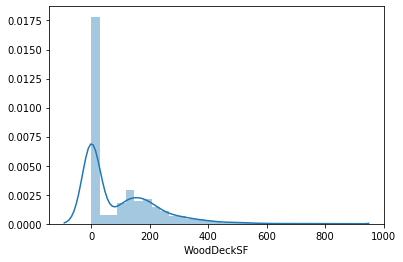

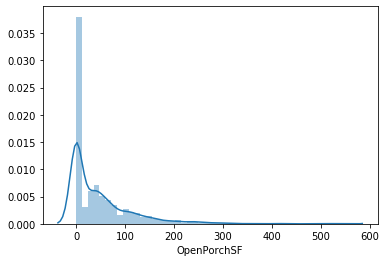

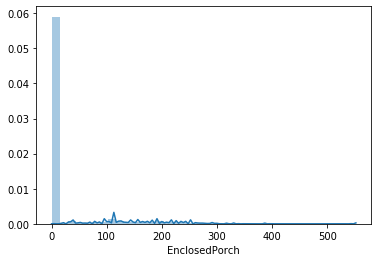

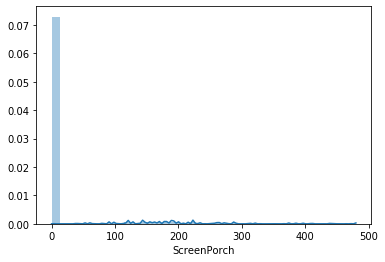

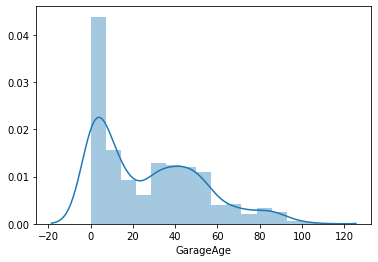

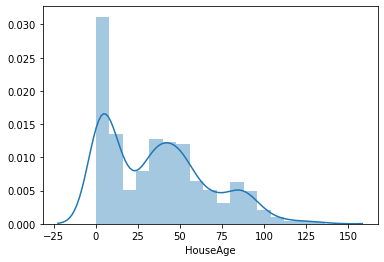

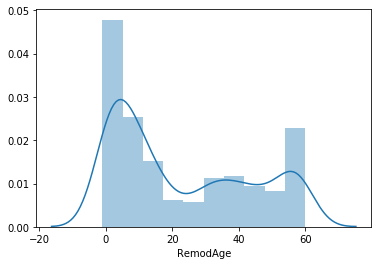

In [131]:
pos = 1
for i in continuous_features:
    sns.distplot(continuous_df[i])
    plt.savefig('continuous{}.jpg'.format(pos))
    pos = pos + 1
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


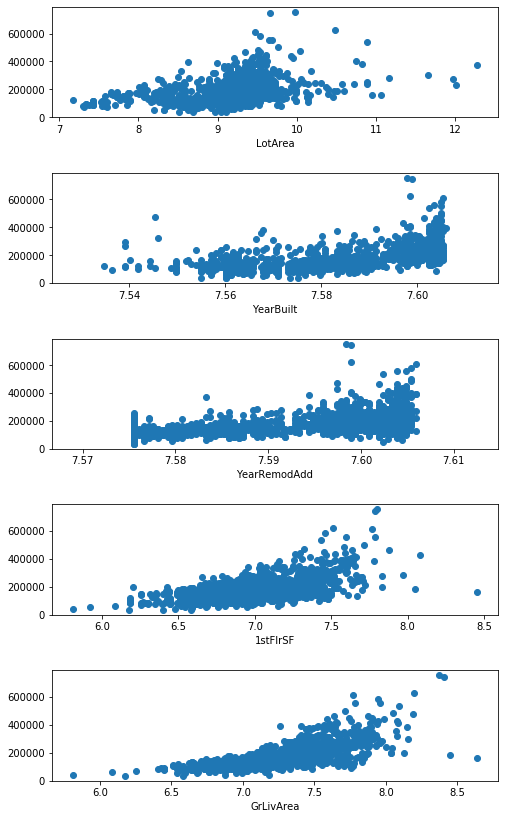

In [132]:
plt.figure(figsize = (8, 60))
plt.subplots_adjust(hspace = 0.5)
pos = 1
for i in continuous_features:
    if 0 in continuous_df[i].unique():
        pass
    else:
        continuous_df[i] = np.log(continuous_df[i])
        plt.subplot(len(continuous_features) , 1 , pos)
        plt.scatter(continuous_df[i] , y)
        plt.xlabel(i)
        pos = pos + 1
plt.show()

With everything sorted, its time we scale the features of the continuous variables.

In [133]:
minmax = MinMaxScaler()

scaled = minmax.fit_transform(continuous_df)

conti_df = pd.DataFrame(scaled , columns = continuous_df.columns)

conti_df.head(5)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,GarageAge,HouseAge,RemodAge
0,0.207668,0.366344,0.950952,0.884883,0.12250,0.125089,0.0,0.064212,0.140098,0.356155,0.413559,0.577712,0.386460,0.000000,0.111517,0.000000,0.0,0.046729,0.036765,0.098361
1,0.255591,0.391317,0.760147,0.437059,0.00000,0.173281,0.0,0.121575,0.206547,0.503056,0.000000,0.470245,0.324401,0.347725,0.000000,0.000000,0.0,0.289720,0.227941,0.524590
2,0.217252,0.422359,0.936907,0.868405,0.10125,0.086109,0.0,0.185788,0.150573,0.383441,0.419370,0.593095,0.428773,0.000000,0.076782,0.000000,0.0,0.065421,0.051471,0.114754
3,0.191693,0.390295,0.319290,0.336712,0.00000,0.038271,0.0,0.231164,0.123732,0.399941,0.366102,0.579157,0.452750,0.000000,0.063985,0.492754,0.0,0.074766,0.669118,0.606557
4,0.268371,0.468761,0.929879,0.835424,0.21875,0.116052,0.0,0.209760,0.187398,0.466237,0.509927,0.666523,0.589563,0.224037,0.153565,0.000000,0.0,0.074766,0.058824,0.147541


With the values scaled, lets now focus our attention to the categorical variables.

### Step 2.2: Analyzing Categorical Variables

In [134]:
cat_features = [cols for cols in X.columns if (X[cols].dtype == 'O')]

cat_df = X[cat_features]

cat_df.head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Lets check the missing values.

In [135]:
cat_df.isnull().sum() * 100 / len(cat_df)

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

It would be better if we can check if the missing values have some sort of relationship with the selling price and thereafter decide on going further.

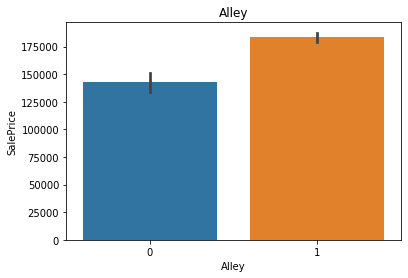

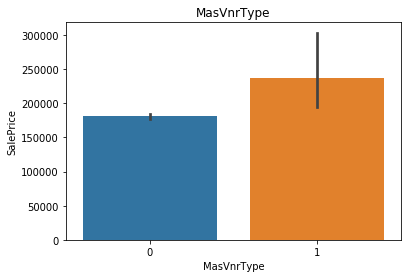

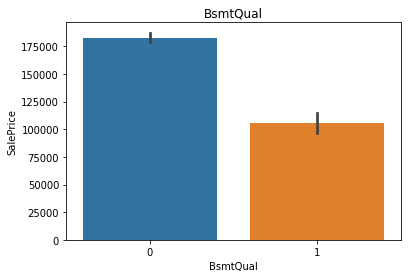

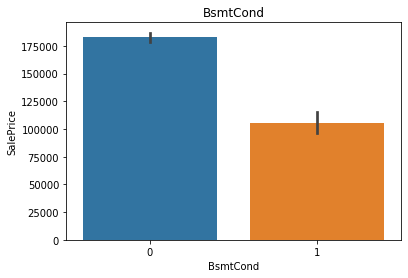

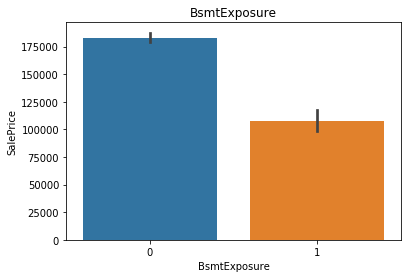

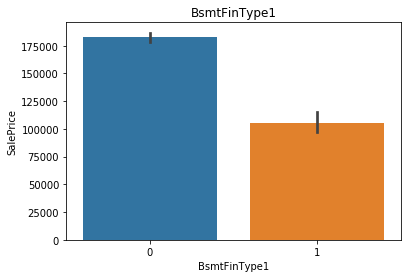

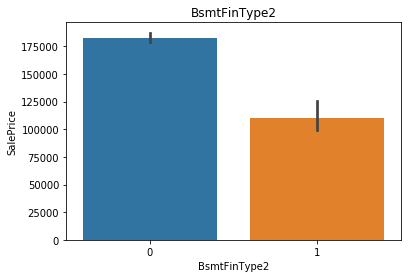

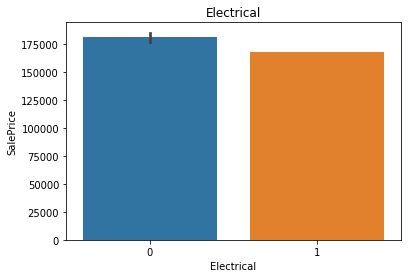

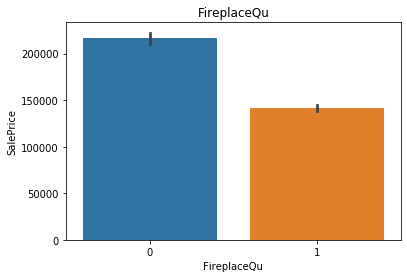

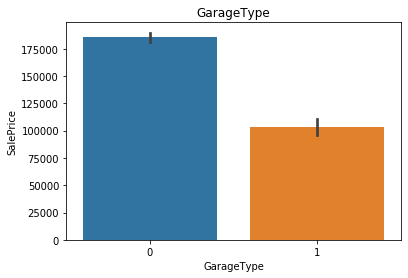

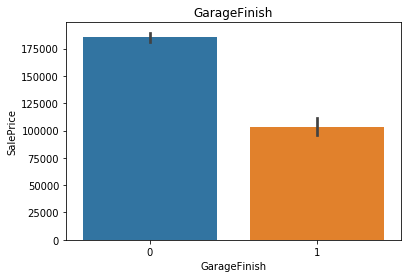

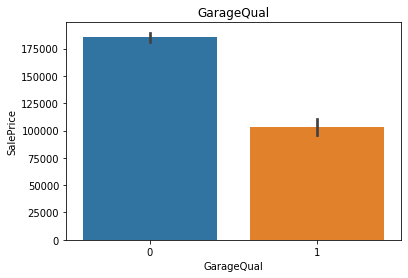

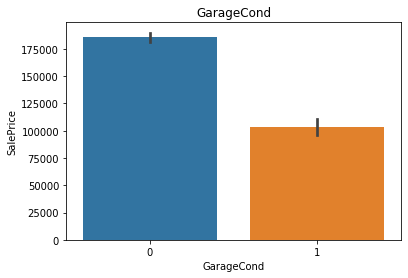

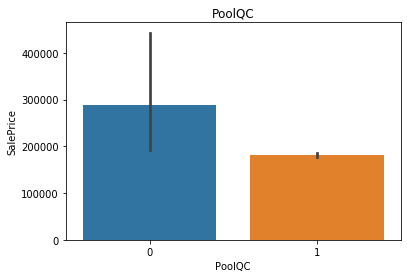

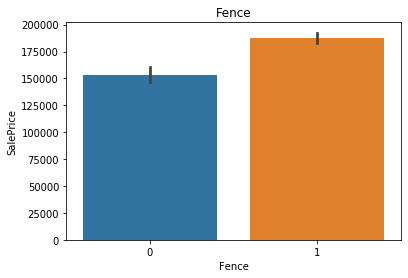

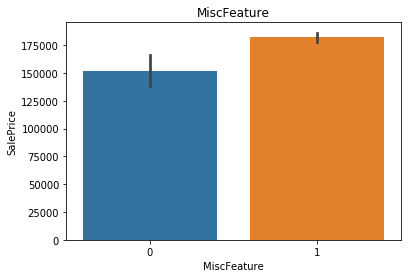

In [136]:
miss_cat_features = [features for features in cat_features if(cat_df[features].isnull().sum() > 0)]
pos = 1
for feature in miss_cat_features:
    cat_data = cat_df.copy()
    cat_data[feature] = np.where(cat_data[feature].isnull() , 1 , 0)
    sns.barplot(cat_data[feature] , y)
    plt.title(feature)
    plt.savefig('missing{}.jpg'.format(pos))
    plt.show()
    pos = pos+1   

In [109]:
len(miss_cat_features)

0

It is evident that the missing values do have a collective factor on the SalePrice.

We can't drop them. Instead we are going to change the NaN values with another subtype and name it as 'Missing'

In [44]:
for features in cat_features:
    cat_df[features] = cat_df[features].fillna('Missing')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
cat_df.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

And done. We have solved the missing values problem.

In [46]:
cat_df.head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


Now, we must keep in mind that our model doesn't take in object values and they are needed to be encoded to numeric ones.

In [47]:
lab = LabelEncoder()

for feature in cat_features:
    lab_encoded = lab.fit_transform(cat_df[feature])
    cat_df[feature] = lab_encoded

cat_df.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,4,2,6,1,0,1,5,2,6,3,1,2,5,5,2,3,2,1,8,4
1,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,3,4,1,2,4,1,0,6,1,0,1,5,3,6,5,1,2,5,5,2,3,2,1,8,4
2,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,3,2,6,1,0,1,5,2,6,5,1,2,5,5,2,3,2,1,8,4
3,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,3,4,0,4,1,4,0,6,1,2,1,5,2,6,2,5,3,5,5,2,3,2,1,8,0
4,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,5,2,6,5,1,2,5,5,2,3,2,1,8,4


In [48]:
minmax = MinMaxScaler()

scaled = minmax.fit_transform(cat_df)

cats_df = pd.DataFrame(scaled , columns = cat_df.columns)

cats_df.head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.75,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.25,0.666667,1.0,0.4,0.5,1.00,1.00,0.333333,1.0,0.2,0.0,1.0,1.0,0.666667,1.0,0.6,0.166667,0.666667,1.0,1.0,1.0,1.0,0.5,0.25,1.0,0.8
1,0.75,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.2,0.142857,0.571429,0.533333,0.75,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,1.0,0.2,0.0,1.0,1.0,1.000000,1.0,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.5,0.25,1.0,0.8
2,0.75,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.25,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,1.0,0.2,0.0,1.0,1.0,0.666667,1.0,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.5,0.25,1.0,0.8
3,0.75,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.928571,1.000000,0.75,1.000000,1.0,0.0,1.0,0.25,1.00,0.000000,1.0,0.2,0.5,1.0,1.0,0.666667,1.0,0.4,0.833333,1.000000,1.0,1.0,1.0,1.0,0.5,0.25,1.0,0.0
4,0.75,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.25,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,1.0,0.2,0.0,1.0,1.0,0.666667,1.0,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.5,0.25,1.0,0.8


In [49]:
df = pd.concat([conti_df , cats_df] , axis = 1)

df.head(5)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,GarageAge,HouseAge,RemodAge,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.207668,0.431124,0.951170,0.885086,0.12250,0.125089,0.0,0.064212,0.140098,0.400467,0.413559,0.624795,0.386460,0.000000,0.111517,0.000000,0.0,0.046729,0.036765,0.098361,0.75,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.25,0.666667,1.0,0.4,0.5,1.00,1.00,0.333333,1.0,0.2,0.0,1.0,1.0,0.666667,1.0,0.6,0.166667,0.666667,1.0,1.0,1.0,1.0,0.5,0.25,1.0,0.8
1,0.255591,0.457169,0.761002,0.437550,0.00000,0.173281,0.0,0.121575,0.206547,0.549599,0.000000,0.519684,0.324401,0.347725,0.000000,0.000000,0.0,0.289720,0.227941,0.524590,0.75,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.2,0.142857,0.571429,0.533333,0.75,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,1.0,0.2,0.0,1.0,1.0,1.000000,1.0,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.5,0.25,1.0,0.8
2,0.217252,0.489044,0.937184,0.868633,0.10125,0.086109,0.0,0.185788,0.150573,0.428805,0.419370,0.639489,0.428773,0.000000,0.076782,0.000000,0.0,0.065421,0.051471,0.114754,0.75,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.25,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,1.0,0.2,0.0,1.0,1.0,0.666667,1.0,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.5,0.25,1.0,0.8
3,0.191693,0.456111,0.320312,0.337158,0.00000,0.038271,0.0,0.231164,0.123732,0.445797,0.366102,0.626179,0.452750,0.000000,0.063985,0.492754,0.0,0.074766,0.669118,0.606557,0.75,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.928571,1.000000,0.75,1.000000,1.0,0.0,1.0,0.25,1.00,0.000000,1.0,0.2,0.5,1.0,1.0,0.666667,1.0,0.4,0.833333,1.000000,1.0,1.0,1.0,1.0,0.5,0.25,1.0,0.0
4,0.268371,0.535696,0.930184,0.835698,0.21875,0.116052,0.0,0.209760,0.187398,0.512997,0.509927,0.708471,0.589563,0.224037,0.153565,0.000000,0.0,0.074766,0.058824,0.147541,0.75,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.2,0.142857,0.857143,0.866667,0.25,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,1.0,0.2,0.0,1.0,1.0,0.666667,1.0,1.0,0.166667,0.666667,1.0,1.0,1.0,1.0,0.5,0.25,1.0,0.8


In [50]:
df.isnull().sum()

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
                ..
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
Length: 63, dtype: int64

In [57]:
len(df.columns)

63

## Step 3: Splitting the data into train test

Lets split the dataset into train and test subsets for future evaluation.

In [51]:
X_train , X_test , y_train , y_test = train_test_split(df , y , test_size = 0.2 , random_state = 1)

## Step 4: Model Selection

Since, the predictive target is a continuous variable, we are going to utilize the following models:

1. ElasticNet regression model.
2. Lasso regression model.
3. Ridge regression model.

In [52]:
elastic = ElasticNet(alpha = 0.005)

elastic.fit(X_train, y_train)

ElasticNet(alpha=0.005, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
elastic.score(X_train , y_train)

0.8205244506588405

In [54]:
elastic.score(X_test , y_test)

0.7994669334978897

In [55]:
lasso = Lasso(alpha = 0.005 , max_iter = 2000)

lasso.fit(X_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 615451635188.6395, tolerance: 711570848.3106698
  positive)


Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=2000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
lasso.score(X_train , y_train)

0.8247446123645744

In [57]:
lasso.score(X_test , y_test)

0.781476078678546

In [58]:
ridge = Ridge(alpha = 0.005)

ridge.fit(X_train , y_train)

Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
ridge.score(X_train , y_train)

0.8247783969956516

In [60]:
ridge.score(X_test , y_test)

0.7816408524257275

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
lr.score(X_train , y_train)

0.812744387723996

In [65]:
lr.score(X_test , y_test)

0.7446818020734274

In [66]:
m = lr.score(X_train , y_train) - lr.score(X_test , y_test)
n = elastic.score(X_train , y_train) - elastic.score(X_test , y_test)

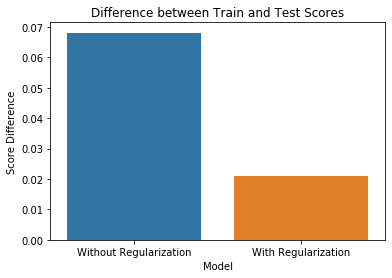

In [68]:
sns.barplot(x = ['Without Regularization' , 'With Regularization'],y = [m , n])
plt.title('Difference between Train and Test Scores')
plt.xlabel('Model')
plt.ylabel('Score Difference')
plt.savefig('score.jpg')
plt.show()

The best fir model was seen by the Elastic net model and hence, it is the model we are going to go ahead with.